[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/05_Weight_Initialization_Regression.ipynb)

## Weight Initialization Compare by using Regression Cases

### 1. Data Visualization and Preprocessing

In [1]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv

--2018-06-18 10:16:44--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14378532 (14M) [text/plain]
Saving to: ‘FFS_01433.csv’

FFS_01433.csv       100%[===================>]  13.71M  27.5MB/s    in 0.5s    

2018-06-18 10:16:45 (27.5 MB/s) - ‘FFS_01433.csv’ saved [14378532/14378532]



In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [6]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


In [0]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [9]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,0.84,1.00,0.27,0.11,0.21,0.32,0.92,0.53,0.47,0.52,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
1,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
2,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.55,0.33,0.19,0.11,0.31,0.78,0.49,0.51,0.18,0.00
3,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
4,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.57,0.39,1.00,0.16,1.00,0.58,0.70,0.00,0.79,0.00


In [10]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


### 2. Building a Deep Neural Network Using ReLU as activation function

In [0]:
def model(init):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
  model.add(Dense(32, activation='relu', kernel_initializer=init))
  model.add(Dense(16, activation='relu', kernel_initializer=init))
  model.add(Dense(8, activation='relu',kernel_initializer=init))
  model.add(Dense(1))
  
  model.compile(loss='mse',optimizer='adam',metrics=['mae'])
  return model
  

### 2.1 Initialze with ReLU and value of Ones

In [0]:
init_1 = initializers.Ones()

In [15]:
model_1 = model(init_1)
model_1_history = model_1.fit(X_train, y_train, epochs=50, verbose=2, validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 10s - loss: 236907010.5367 - mean_absolute_error: 2402.0875 - val_loss: 0.0386 - val_mean_absolute_error: 0.1606
Epoch 2/50
 - 9s - loss: 0.0372 - mean_absolute_error: 0.1569 - val_loss: 0.0379 - val_mean_absolute_error: 0.1590
Epoch 3/50
 - 10s - loss: 0.0370 - mean_absolute_error: 0.1566 - val_loss: 0.0381 - val_mean_absolute_error: 0.1593
Epoch 4/50
 - 9s - loss: 0.0373 - mean_absolute_error: 0.1571 - val_loss: 0.0408 - val_mean_absolute_error: 0.1645
Epoch 5/50
 - 10s - loss: 0.0388 - mean_absolute_error: 0.1599 - val_loss: 0.0380 - val_mean_absolute_error: 0.1593
Epoch 6/50
 - 10s - loss: 0.0405 - mean_absolute_error: 0.1633 - val_loss: 0.0387 - val_mean_absolute_error: 0.1610
Epoch 7/50
 - 9s - loss: 0.0674 - mean_absolute_error: 0.2067 - val_loss: 0.0432 - val_mean_absolute_error: 0.1679
Epoch 8/50
 - 9s - loss: 8985.3653 - mean_absolute_error: 17.4425 - val_loss: 3.2342 - val_mean_absolute_error: 1.7879
Epoch 9/50
 

Epoch 29/50
 - 9s - loss: 1.1390 - mean_absolute_error: 0.6986 - val_loss: 0.9345 - val_mean_absolute_error: 0.9470
Epoch 30/50
 - 9s - loss: 0.5187 - mean_absolute_error: 0.5674 - val_loss: 0.9266 - val_mean_absolute_error: 0.9427
Epoch 31/50
 - 9s - loss: 0.2591 - mean_absolute_error: 0.3938 - val_loss: 0.4320 - val_mean_absolute_error: 0.6309
Epoch 32/50
 - 9s - loss: 0.1194 - mean_absolute_error: 0.2725 - val_loss: 0.0785 - val_mean_absolute_error: 0.2356
Epoch 33/50
 - 9s - loss: 0.0783 - mean_absolute_error: 0.2215 - val_loss: 0.0286 - val_mean_absolute_error: 0.1389
Epoch 34/50
 - 9s - loss: 0.0460 - mean_absolute_error: 0.1715 - val_loss: 0.0268 - val_mean_absolute_error: 0.1341
Epoch 35/50
 - 9s - loss: 0.0304 - mean_absolute_error: 0.1395 - val_loss: 0.0216 - val_mean_absolute_error: 0.1178
Epoch 36/50
 - 9s - loss: 0.0208 - mean_absolute_error: 0.1148 - val_loss: 0.0194 - val_mean_absolute_error: 0.1114
Epoch 37/50
 - 9s - loss: 0.0173 - mean_absolute_error: 0.1049 - val_los

In [19]:
train_loss_1 = model_1.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))

Training loss  0.03064331057241226
Testing loss 0.03146518390746192


In [21]:
y_pred_1 = model_1.predict(X_test)
r2_score(y_test, y_pred_1)  

-0.0019616681234433386

### 2.2 Initialize with ReLU and RandomNormal mean=0.0, stddev=0.5

In [0]:
init_2 = initializers.RandomNormal(mean=0.0, stddev=0.5)

In [24]:
model_2 = model(init_2)
model_2_history = model_2.fit(X_train, y_train, epochs=50, verbose=2, validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 9s - loss: 0.2573 - mean_absolute_error: 0.2411 - val_loss: 0.0297 - val_mean_absolute_error: 0.1410
Epoch 2/50
 - 9s - loss: 0.0259 - mean_absolute_error: 0.1305 - val_loss: 0.0230 - val_mean_absolute_error: 0.1225
Epoch 3/50
 - 9s - loss: 0.0211 - mean_absolute_error: 0.1163 - val_loss: 0.0202 - val_mean_absolute_error: 0.1136
Epoch 4/50
 - 9s - loss: 0.0184 - mean_absolute_error: 0.1086 - val_loss: 0.0177 - val_mean_absolute_error: 0.1066
Epoch 5/50
 - 9s - loss: 0.0166 - mean_absolute_error: 0.1033 - val_loss: 0.0161 - val_mean_absolute_error: 0.1013
Epoch 6/50
 - 9s - loss: 0.0154 - mean_absolute_error: 0.0995 - val_loss: 0.0150 - val_mean_absolute_error: 0.0976
Epoch 7/50
 - 9s - loss: 0.0147 - mean_absolute_error: 0.0971 - val_loss: 0.0142 - val_mean_absolute_error: 0.0950
Epoch 8/50
 - 9s - loss: 0.0140 - mean_absolute_error: 0.0948 - val_loss: 0.0136 - val_mean_absolute_error: 0.0928
Epoch 9/50
 - 9s - loss: 0.0134

 - 9s - loss: 0.0092 - mean_absolute_error: 0.0755 - val_loss: 0.0095 - val_mean_absolute_error: 0.0767
Epoch 30/50
 - 9s - loss: 0.0091 - mean_absolute_error: 0.0751 - val_loss: 0.0097 - val_mean_absolute_error: 0.0786
Epoch 31/50
 - 10s - loss: 0.0090 - mean_absolute_error: 0.0748 - val_loss: 0.0093 - val_mean_absolute_error: 0.0765
Epoch 32/50
 - 9s - loss: 0.0089 - mean_absolute_error: 0.0742 - val_loss: 0.0094 - val_mean_absolute_error: 0.0765
Epoch 33/50
 - 9s - loss: 0.0089 - mean_absolute_error: 0.0739 - val_loss: 0.0095 - val_mean_absolute_error: 0.0764
Epoch 34/50
 - 10s - loss: 0.0088 - mean_absolute_error: 0.0735 - val_loss: 0.0093 - val_mean_absolute_error: 0.0768
Epoch 35/50
 - 9s - loss: 0.0087 - mean_absolute_error: 0.0733 - val_loss: 0.0092 - val_mean_absolute_error: 0.0753
Epoch 36/50
 - 9s - loss: 0.0086 - mean_absolute_error: 0.0726 - val_loss: 0.0093 - val_mean_absolute_error: 0.0758
Epoch 37/50
 - 10s - loss: 0.0086 - mean_absolute_error: 0.0728 - val_loss: 0.0094

In [25]:
train_loss_2 = model_2.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))

Training loss  0.007834954193479635
Testing loss 0.009037951860703669


In [26]:
y_pred_2 = model_2.predict(X_test)
r2_score(y_test, y_pred_2)  

0.7121999551097618

### 2.3 Initialize with ReLU and RandomNormal mean=0.0, stddev=0.1



In [0]:
init_3 = initializers.RandomNormal(mean=0.0, stddev=0.1)

In [28]:
model_3 = model(init_3)
model_3_history = model_3.fit(X_train,y_train,epochs=50, verbose=2, 
                              validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 10s - loss: 0.0187 - mean_absolute_error: 0.1064 - val_loss: 0.0134 - val_mean_absolute_error: 0.0932
Epoch 2/50
 - 9s - loss: 0.0128 - mean_absolute_error: 0.0907 - val_loss: 0.0118 - val_mean_absolute_error: 0.0869
Epoch 3/50
 - 10s - loss: 0.0118 - mean_absolute_error: 0.0869 - val_loss: 0.0117 - val_mean_absolute_error: 0.0877
Epoch 4/50
 - 9s - loss: 0.0112 - mean_absolute_error: 0.0845 - val_loss: 0.0111 - val_mean_absolute_error: 0.0837
Epoch 5/50
 - 9s - loss: 0.0108 - mean_absolute_error: 0.0826 - val_loss: 0.0111 - val_mean_absolute_error: 0.0846
Epoch 6/50
 - 10s - loss: 0.0104 - mean_absolute_error: 0.0810 - val_loss: 0.0102 - val_mean_absolute_error: 0.0800
Epoch 7/50
 - 9s - loss: 0.0101 - mean_absolute_error: 0.0798 - val_loss: 0.0111 - val_mean_absolute_error: 0.0840
Epoch 8/50
 - 9s - loss: 0.0099 - mean_absolute_error: 0.0788 - val_loss: 0.0107 - val_mean_absolute_error: 0.0812
Epoch 9/50
 - 10s - loss: 0.

 - 9s - loss: 0.0078 - mean_absolute_error: 0.0686 - val_loss: 0.0084 - val_mean_absolute_error: 0.0714
Epoch 30/50
 - 9s - loss: 0.0078 - mean_absolute_error: 0.0685 - val_loss: 0.0082 - val_mean_absolute_error: 0.0694
Epoch 31/50
 - 9s - loss: 0.0077 - mean_absolute_error: 0.0682 - val_loss: 0.0087 - val_mean_absolute_error: 0.0734
Epoch 32/50
 - 9s - loss: 0.0077 - mean_absolute_error: 0.0681 - val_loss: 0.0087 - val_mean_absolute_error: 0.0731
Epoch 33/50
 - 9s - loss: 0.0077 - mean_absolute_error: 0.0678 - val_loss: 0.0090 - val_mean_absolute_error: 0.0725
Epoch 34/50
 - 9s - loss: 0.0077 - mean_absolute_error: 0.0678 - val_loss: 0.0087 - val_mean_absolute_error: 0.0711
Epoch 35/50
 - 9s - loss: 0.0076 - mean_absolute_error: 0.0674 - val_loss: 0.0086 - val_mean_absolute_error: 0.0734
Epoch 36/50
 - 9s - loss: 0.0076 - mean_absolute_error: 0.0672 - val_loss: 0.0083 - val_mean_absolute_error: 0.0707
Epoch 37/50
 - 9s - loss: 0.0075 - mean_absolute_error: 0.0669 - val_loss: 0.0087 - 

In [29]:
train_loss_3 = model_3.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_3))
test_loss_3 = model_3.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_3))

Training loss  0.007378135288197301
Testing loss 0.008361651435590551


In [30]:
y_pred_3 = model_3.predict(X_test)
r2_score(y_test, y_pred_3) 

0.7337357298122889

### 2.4 Initialize with ReLU and Xavier Initialization

In [0]:
init_4 = initializers.glorot_normal()

In [32]:
model_4 = model(init_4)
model_4_history = model_4.fit(X_train,y_train,epochs=50, verbose=2, 
                              validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 10s - loss: 0.0157 - mean_absolute_error: 0.0995 - val_loss: 0.0157 - val_mean_absolute_error: 0.1017
Epoch 2/50
 - 9s - loss: 0.0126 - mean_absolute_error: 0.0896 - val_loss: 0.0120 - val_mean_absolute_error: 0.0881
Epoch 3/50
 - 9s - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0113 - val_mean_absolute_error: 0.0850
Epoch 4/50
 - 10s - loss: 0.0111 - mean_absolute_error: 0.0836 - val_loss: 0.0110 - val_mean_absolute_error: 0.0833
Epoch 5/50
 - 9s - loss: 0.0105 - mean_absolute_error: 0.0815 - val_loss: 0.0106 - val_mean_absolute_error: 0.0820
Epoch 6/50
 - 9s - loss: 0.0102 - mean_absolute_error: 0.0802 - val_loss: 0.0103 - val_mean_absolute_error: 0.0797
Epoch 7/50
 - 10s - loss: 0.0099 - mean_absolute_error: 0.0785 - val_loss: 0.0103 - val_mean_absolute_error: 0.0811
Epoch 8/50
 - 9s - loss: 0.0097 - mean_absolute_error: 0.0777 - val_loss: 0.0095 - val_mean_absolute_error: 0.0771
Epoch 9/50
 - 9s - loss: 0.0

 - 9s - loss: 0.0077 - mean_absolute_error: 0.0681 - val_loss: 0.0085 - val_mean_absolute_error: 0.0713
Epoch 30/50
 - 9s - loss: 0.0076 - mean_absolute_error: 0.0679 - val_loss: 0.0086 - val_mean_absolute_error: 0.0711
Epoch 31/50
 - 9s - loss: 0.0075 - mean_absolute_error: 0.0675 - val_loss: 0.0081 - val_mean_absolute_error: 0.0696
Epoch 32/50
 - 9s - loss: 0.0074 - mean_absolute_error: 0.0670 - val_loss: 0.0081 - val_mean_absolute_error: 0.0694
Epoch 33/50
 - 9s - loss: 0.0074 - mean_absolute_error: 0.0670 - val_loss: 0.0083 - val_mean_absolute_error: 0.0704
Epoch 34/50
 - 9s - loss: 0.0074 - mean_absolute_error: 0.0670 - val_loss: 0.0081 - val_mean_absolute_error: 0.0690
Epoch 35/50
 - 9s - loss: 0.0074 - mean_absolute_error: 0.0669 - val_loss: 0.0080 - val_mean_absolute_error: 0.0686
Epoch 36/50
 - 9s - loss: 0.0073 - mean_absolute_error: 0.0664 - val_loss: 0.0082 - val_mean_absolute_error: 0.0702
Epoch 37/50
 - 9s - loss: 0.0073 - mean_absolute_error: 0.0663 - val_loss: 0.0080 - 

In [33]:
train_loss_4 = model_4.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_4.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))

Training loss  0.007412832856903041
Testing loss 0.008555501557547621


In [34]:
y_pred_4 = model_4.predict(X_test)
r2_score(y_test, y_pred_4) 

0.7275628624719939

### 2.5 Initialize with ReLU TruncatedNormal

In [0]:
init_5 = initializers.TruncatedNormal()

In [36]:
model_5 = model(init_5)
model_5_history = model_5.fit(X_train,y_train,epochs=50, verbose=2, 
                              validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 9s - loss: 0.0201 - mean_absolute_error: 0.1112 - val_loss: 0.0165 - val_mean_absolute_error: 0.1029
Epoch 2/50
 - 10s - loss: 0.0153 - mean_absolute_error: 0.0989 - val_loss: 0.0144 - val_mean_absolute_error: 0.0955
Epoch 3/50
 - 9s - loss: 0.0143 - mean_absolute_error: 0.0957 - val_loss: 0.0141 - val_mean_absolute_error: 0.0952
Epoch 4/50
 - 9s - loss: 0.0138 - mean_absolute_error: 0.0939 - val_loss: 0.0139 - val_mean_absolute_error: 0.0937
Epoch 5/50
 - 10s - loss: 0.0133 - mean_absolute_error: 0.0924 - val_loss: 0.0132 - val_mean_absolute_error: 0.0921
Epoch 6/50
 - 9s - loss: 0.0130 - mean_absolute_error: 0.0911 - val_loss: 0.0130 - val_mean_absolute_error: 0.0909
Epoch 7/50
 - 9s - loss: 0.0124 - mean_absolute_error: 0.0891 - val_loss: 0.0120 - val_mean_absolute_error: 0.0879
Epoch 8/50
 - 10s - loss: 0.0121 - mean_absolute_error: 0.0882 - val_loss: 0.0122 - val_mean_absolute_error: 0.0877
Epoch 9/50
 - 9s - loss: 0.0

 - 10s - loss: 0.0095 - mean_absolute_error: 0.0772 - val_loss: 0.0099 - val_mean_absolute_error: 0.0781
Epoch 30/50
 - 9s - loss: 0.0095 - mean_absolute_error: 0.0769 - val_loss: 0.0104 - val_mean_absolute_error: 0.0794
Epoch 31/50
 - 9s - loss: 0.0095 - mean_absolute_error: 0.0769 - val_loss: 0.0096 - val_mean_absolute_error: 0.0775
Epoch 32/50
 - 10s - loss: 0.0094 - mean_absolute_error: 0.0763 - val_loss: 0.0098 - val_mean_absolute_error: 0.0772
Epoch 33/50
 - 9s - loss: 0.0093 - mean_absolute_error: 0.0760 - val_loss: 0.0092 - val_mean_absolute_error: 0.0757
Epoch 34/50
 - 9s - loss: 0.0093 - mean_absolute_error: 0.0758 - val_loss: 0.0095 - val_mean_absolute_error: 0.0768
Epoch 35/50
 - 10s - loss: 0.0092 - mean_absolute_error: 0.0756 - val_loss: 0.0093 - val_mean_absolute_error: 0.0751
Epoch 36/50
 - 9s - loss: 0.0092 - mean_absolute_error: 0.0755 - val_loss: 0.0093 - val_mean_absolute_error: 0.0758
Epoch 37/50
 - 10s - loss: 0.0091 - mean_absolute_error: 0.0752 - val_loss: 0.009

In [37]:
train_loss_5 = model_5.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_5))
test_loss_5 = model_5.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_5))

Training loss  0.008453980901530498
Testing loss 0.009105485437651177


In [38]:
y_pred_5 = model_5.predict(X_test)
r2_score(y_test, y_pred_5) 

0.7100494484115094

### 2.6 Initialize with ReLU He_Normal

In [0]:
init_6 = initializers.he_normal()

In [40]:
model_6 = model(init_6)
model_6_history = model_6.fit(X_train,y_train,epochs=50, verbose=2, 
                              validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
 - 10s - loss: 0.0166 - mean_absolute_error: 0.1017 - val_loss: 0.0152 - val_mean_absolute_error: 0.0976
Epoch 2/50
 - 9s - loss: 0.0131 - mean_absolute_error: 0.0913 - val_loss: 0.0120 - val_mean_absolute_error: 0.0872
Epoch 3/50
 - 9s - loss: 0.0122 - mean_absolute_error: 0.0882 - val_loss: 0.0120 - val_mean_absolute_error: 0.0866
Epoch 4/50
 - 9s - loss: 0.0115 - mean_absolute_error: 0.0853 - val_loss: 0.0120 - val_mean_absolute_error: 0.0863
Epoch 5/50
 - 9s - loss: 0.0110 - mean_absolute_error: 0.0834 - val_loss: 0.0122 - val_mean_absolute_error: 0.0886
Epoch 6/50
 - 9s - loss: 0.0106 - mean_absolute_error: 0.0816 - val_loss: 0.0104 - val_mean_absolute_error: 0.0808
Epoch 7/50
 - 9s - loss: 0.0103 - mean_absolute_error: 0.0806 - val_loss: 0.0116 - val_mean_absolute_error: 0.0874
Epoch 8/50
 - 9s - loss: 0.0100 - mean_absolute_error: 0.0793 - val_loss: 0.0104 - val_mean_absolute_error: 0.0795
Epoch 9/50
 - 9s - loss: 0.009

 - 9s - loss: 0.0078 - mean_absolute_error: 0.0689 - val_loss: 0.0086 - val_mean_absolute_error: 0.0720
Epoch 30/50
 - 9s - loss: 0.0079 - mean_absolute_error: 0.0689 - val_loss: 0.0088 - val_mean_absolute_error: 0.0736
Epoch 31/50
 - 10s - loss: 0.0078 - mean_absolute_error: 0.0686 - val_loss: 0.0088 - val_mean_absolute_error: 0.0746
Epoch 32/50
 - 9s - loss: 0.0077 - mean_absolute_error: 0.0683 - val_loss: 0.0085 - val_mean_absolute_error: 0.0713
Epoch 33/50
 - 10s - loss: 0.0077 - mean_absolute_error: 0.0683 - val_loss: 0.0087 - val_mean_absolute_error: 0.0720
Epoch 34/50
 - 10s - loss: 0.0076 - mean_absolute_error: 0.0681 - val_loss: 0.0084 - val_mean_absolute_error: 0.0713
Epoch 35/50
 - 9s - loss: 0.0076 - mean_absolute_error: 0.0677 - val_loss: 0.0085 - val_mean_absolute_error: 0.0728
Epoch 36/50
 - 10s - loss: 0.0075 - mean_absolute_error: 0.0676 - val_loss: 0.0085 - val_mean_absolute_error: 0.0717
Epoch 37/50
 - 10s - loss: 0.0075 - mean_absolute_error: 0.0674 - val_loss: 0.00

In [41]:
train_loss_6 = model_6.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_6))
test_loss_6 = model_6.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_6))

Training loss  0.007148779367171269
Testing loss 0.00839882552904861


In [42]:
y_pred_6= model_6.predict(X_test)
r2_score(y_test, y_pred_6)

0.7325519761064958

In [0]:
colors = sns.color_palette("bright", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.5

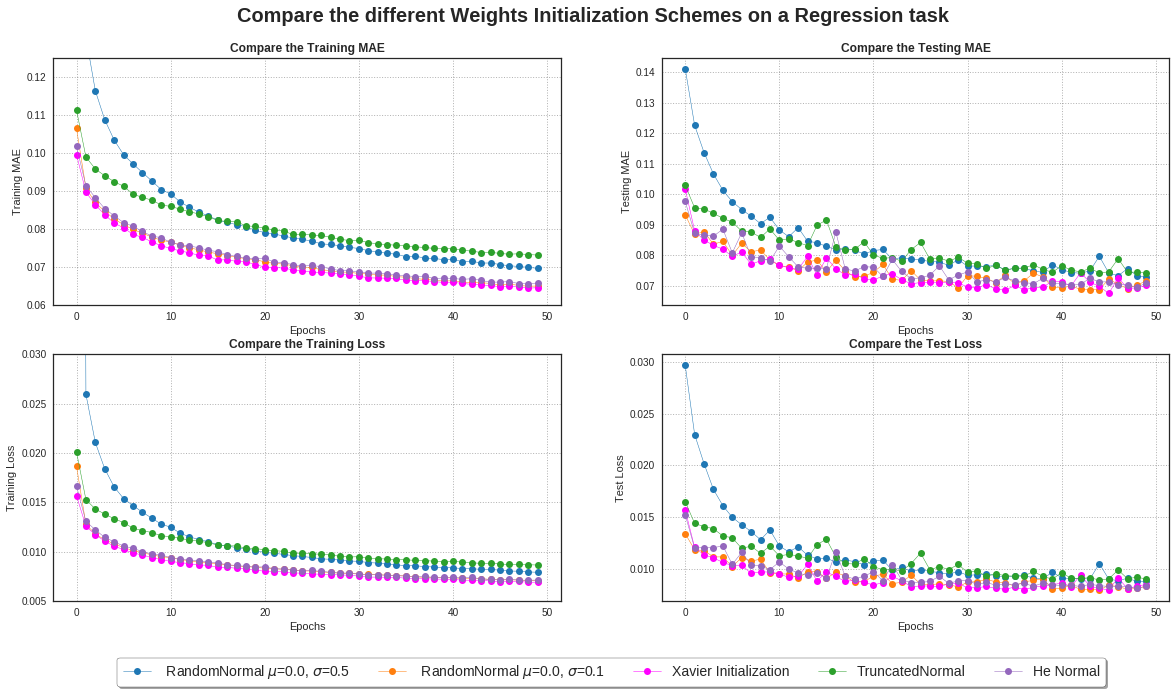

In [64]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))

#ax1.plot(model_1_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax1.plot(model_2_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax1.plot(model_3_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax1.plot(model_4_history.history['mean_absolute_error'], linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax1.plot(model_5_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax1.plot(model_6_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[4],label='He Normal')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE')
ax1.set_ylim(0.06,0.125)
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training MAE',fontsize=12, fontweight='bold')

#ax2.plot(model_1_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax2.plot(model_2_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax2.plot(model_3_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax2.plot(model_4_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax2.plot(model_5_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax2.plot(model_6_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[4],label='He Normal')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Testing MAE')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Testing MAE',fontsize=12, fontweight='bold')


#ax3.plot(model_1_history.history['loss'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax3.plot(model_2_history.history['loss'], linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax3.plot(model_3_history.history['loss'], linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax3.plot(model_4_history.history['loss'], linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax3.plot(model_5_history.history['loss'], linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax3.plot(model_6_history.history['loss'], linestyle='-', marker='o',color=colors[4],label='He Normal')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0.005,0.03)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=12, fontweight='bold')

#ax4.plot(model_1_history.history['val_loss'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax4.plot(model_2_history.history['val_loss'], linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax4.plot(model_3_history.history['val_loss'], linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax4.plot(model_4_history.history['val_loss'], linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax4.plot(model_5_history.history['val_loss'], linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax4.plot(model_6_history.history['val_loss'], linestyle='-', marker='o',color=colors[4],label='He Normal')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
#ax4.set_ylim(0.0025,0.02)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=12, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),
          ncol=6, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=14)


fig.suptitle('Compare the different Weights Initialization Schemes on a Regression task',fontsize=20, fontweight='bold',y=0.95)
plt.show()

In [0]:
import numpy as np

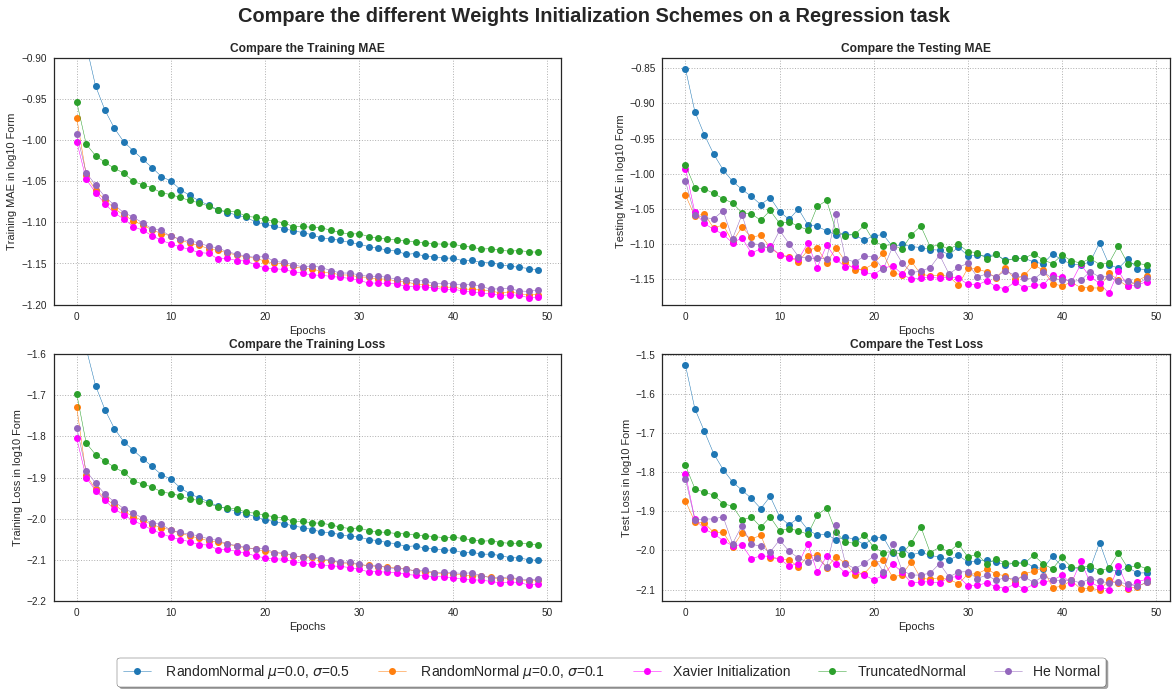

In [72]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))

#ax1.plot(model_1_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax1.plot(np.log10(model_2_history.history['mean_absolute_error']), linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax1.plot(np.log10(model_3_history.history['mean_absolute_error']), linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax1.plot(np.log10(model_4_history.history['mean_absolute_error']), linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax1.plot(np.log10(model_5_history.history['mean_absolute_error']), linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax1.plot(np.log10(model_6_history.history['mean_absolute_error']), linestyle='-', marker='o',color=colors[4],label='He Normal')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE in log10 Form')
ax1.set_ylim(-1.2,-0.9)
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training MAE',fontsize=12, fontweight='bold')

#ax2.plot(model_1_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax2.plot(np.log10(model_2_history.history['val_mean_absolute_error']), linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax2.plot(np.log10(model_3_history.history['val_mean_absolute_error']), linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax2.plot(np.log10(model_4_history.history['val_mean_absolute_error']), linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax2.plot(np.log10(model_5_history.history['val_mean_absolute_error']), linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax2.plot(np.log10(model_6_history.history['val_mean_absolute_error']), linestyle='-', marker='o',color=colors[4],label='He Normal')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Testing MAE in log10 Form')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Testing MAE',fontsize=12, fontweight='bold')


#ax3.plot(model_1_history.history['loss'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax3.plot(np.log10(model_2_history.history['loss']), linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax3.plot(np.log10(model_3_history.history['loss']), linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax3.plot(np.log10(model_4_history.history['loss']), linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax3.plot(np.log10(model_5_history.history['loss']), linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax3.plot(np.log10(model_6_history.history['loss']), linestyle='-', marker='o',color=colors[4],label='He Normal')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss in log10 Form')
ax3.set_ylim(-2.2,-1.6)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=12, fontweight='bold')

#ax4.plot(model_1_history.history['val_loss'], linestyle='-', marker='o',color=colors[0],label='Constants=Ones')
ax4.plot(np.log10(model_2_history.history['val_loss']), linestyle='-', marker='o',color=colors[0],label=' RandomNormal $\mu$=0.0, $\sigma$=0.5')
ax4.plot(np.log10(model_3_history.history['val_loss']), linestyle='-', marker='o',color=colors[1],label=' RandomNormal $\mu$=0.0, $\sigma$=0.1')
ax4.plot(np.log10(model_4_history.history['val_loss']), linestyle='-', marker='o',color='fuchsia',label='Xavier Initialization')
ax4.plot(np.log10(model_5_history.history['val_loss']), linestyle='-', marker='o',color=colors[2],label='TruncatedNormal')
ax4.plot(np.log10(model_6_history.history['val_loss']), linestyle='-', marker='o',color=colors[4],label='He Normal')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss in log10 Form')
#ax4.set_ylim(0.0025,0.02)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=12, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),
          ncol=6, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=14)


fig.suptitle('Compare the different Weights Initialization Schemes on a Regression task',fontsize=20, fontweight='bold',y=0.95)
plt.show()